In [8]:
import pandas as pd
import numpy as np
new_df = pd.DataFrame()

# Load the stock data into two separate dataframes, stockA and stockB
stockB = pd.read_csv("D:\Downloads\Gemini_ETHUSD_1h.csv")
stockA = pd.read_csv("D:\Downloads\Gemini_BTCUSD_1h.csv")
stockA['date'] = pd.to_datetime(stockA['date'])
stockB['date'] = pd.to_datetime(stockB['date'])
# select rows with date after 2020-01-01
stockA = stockA[stockA['date'] > '2020-01-01']
stockB = stockB[stockB['date'] > '2020-01-01']
# make date as index
stockA.set_index('date', inplace=True)
stockB.set_index('date', inplace=True)
# select 3 columns which are date and symbol and close columns
stockA = stockA[['symbol','close']]
stockB = stockB[['symbol','close']]

# Set the lookback window and the list of N-day periods to compute z-scores for
lookback_window = 60
n_periods = [1, 5, 10, 20]

# Compute the rolling N-day returns for each stock
for n in n_periods:
    stockA[f'returns_{n}d'] = (stockA['close'] - stockA['close'].shift(n)) / stockA['close'].shift(n)
    stockB[f'returns_{n}d'] = (stockB['close'] - stockB['close'].shift(n)) / stockB['close'].shift(n)

# Compute the trailing N-day means and standard deviations for each stock
for n in n_periods:
    stockA[f'stddev_{n}d'] = stockA[f'returns_{n}d'].rolling(window= (20 if n == 1 else lookback_window)).std(ddof=1).shift(1)
    stockB[f'stddev_{n}d'] = stockB[f'returns_{n}d'].rolling(window= (20 if n == 1 else lookback_window)).std(ddof=1).shift(1)

# Compute the z-scores for each stock for each N-day period
for n in n_periods:
    stockA[f'zscore_{n}d'] = stockA[f'returns_{n}d'] / stockA[f'stddev_{n}d']
    stockB[f'zscore_{n}d'] = stockB[f'returns_{n}d'] / stockB[f'stddev_{n}d']

for n in n_periods:
    new_df[f'zdiff_{n}d'] = stockA[f'zscore_{n}d'] - stockB[f'zscore_{n}d']

new_df["stddev_1d_BTC"] = stockA["stddev_1d"]
new_df["stddev_1d_ETH"] = stockB["stddev_1d"] 
new_df["diff_1d"] = stockA["returns_1d"] - stockB["returns_1d"]

In [9]:
stockA.tail()

,symbol,close,returns_1d,returns_5d,returns_10d,returns_20d,stddev_1d,stddev_5d,stddev_10d,stddev_20d,zscore_1d,zscore_5d,zscore_10d,zscore_20d
date,,,,,,,,,,,,,,
2023-04-14 19:00:00,BTC/USD,30336.07,0.001219,-0.009722,-0.015967,-0.002513,0.004917,0.007220,0.009248,0.009652,0.247795,-1.346486,-1.726506,-0.260402
2023-04-14 20:00:00,BTC/USD,30466.45,0.004298,0.006616,-0.011019,0.001680,0.004889,0.007350,0.009478,0.009655,0.879028,0.900234,-1.162593,0.173984
2023-04-14 21:00:00,BTC/USD,30475.61,0.000301,0.010560,-0.011633,0.001981,0.004988,0.007387,0.009465,0.009562,0.060275,1.429589,-1.229023,0.207161
2023-04-14 22:00:00,BTC/USD,30472.66,-0.000097,0.006370,-0.003866,0.001315,0.004988,0.007490,0.009567,0.009433,-0.019405,0.850455,-0.404056,0.139411
2023-04-14 23:00:00,BTC/USD,30484.98,0.000404,0.006133,-0.009202,-0.007745,0.004987,0.007520,0.009515,0.009404,0.081066,0.815592,-0.967142,-0.823577


In [10]:
stockB.tail()

,symbol,close,returns_1d,returns_5d,returns_10d,returns_20d,stddev_1d,stddev_5d,stddev_10d,stddev_20d,zscore_1d,zscore_5d,zscore_10d,zscore_20d
date,,,,,,,,,,,,,,
2023-04-14 19:00:00,ETH/USD,2092.42,0.004981,-0.001308,-0.010133,0.038834,0.012516,0.018018,0.023106,0.027008,0.397931,-0.072583,-0.438554,1.437900
2023-04-14 20:00:00,ETH/USD,2107.51,0.007212,0.023108,-0.003282,0.046919,0.012536,0.018046,0.023054,0.025973,0.575283,1.280515,-0.142370,1.806461
2023-04-14 21:00:00,ETH/USD,2105.20,-0.001096,0.020569,-0.005485,0.045771,0.012573,0.018111,0.022795,0.024831,-0.087174,1.135747,-0.240607,1.843323
2023-04-14 22:00:00,ETH/USD,2106.46,0.000599,0.014150,0.008286,0.046397,0.012587,0.018134,0.022665,0.023545,0.047552,0.780303,0.365579,1.970596
2023-04-14 23:00:00,ETH/USD,2101.50,-0.002355,0.009342,-0.002970,-0.004349,0.012582,0.018132,0.022419,0.022422,-0.187151,0.515202,-0.132478,-0.193979


In [11]:
# sharpe of buy and hold on stockA and stockB
sharpe_A = np.sqrt(365*24)*stockA["returns_1d"].mean() / stockA["returns_1d"].std()
sharpe_B = np.sqrt(365*24)*stockB["returns_1d"].mean() / stockB["returns_1d"].std()
print("sharpe of buy and hold on stockA: ", sharpe_A)
print("sharpe of buy and hold on stockB: ", sharpe_B)


sharpe of buy and hold on stockA:  0.9634310180638209
sharpe of buy and hold on stockB:  1.3701604210203886


In [12]:
# perform dickey-fuller test on stockA with StockB

from statsmodels.tsa.stattools import adfuller
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC') # dropna() handles differenced data
    labels = ['ADF Test Statistic','p-value','# Lags Used','Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key,value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [25]:
# Perform Granger Causality Test to check if Stock A causes Stock B
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=18

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.
    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=True)
            print(test_result)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

# make a df which contains just log value of close price of stockA and stockB
df = pd.DataFrame()
df['stockA'] = np.log(stockA['close'])
df['stockB'] = np.log(stockB['close'])
# drop na values
df.dropna(inplace=True)
# take difference of log of close price
df['diff'] = (np.log(df['stockA'])) - np.log(df['stockB'])
# Take ratio of log of close price
df['ratio'] = (df['stockA']) / (df['stockB'])

# check if the difference of log of close price is stationary
adf_test(df['diff'])

# check if the ratio of log of close price is stationary
adf_test(df['ratio'])

# check if stockA causes stockB
grangers_causation_matrix(df, variables = ['stockA','stockB'])


Augmented Dickey-Fuller Test: 
ADF Test Statistic                -2.456153
p-value                            0.126510
# Lags Used                       40.000000
Number of Observations Used    28758.000000
Critical Value (1%)               -3.430577
Critical Value (5%)               -2.861641
Critical Value (10%)              -2.566823
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Augmented Dickey-Fuller Test: 
ADF Test Statistic                -2.650795
p-value                            0.082947
# Lags Used                       40.000000
Number of Observations Used    28758.000000
Critical Value (1%)               -3.430577
Critical Value (5%)               -2.861641
Critical Value (10%)              -2.566823
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=28795, df_num=1

,stockA_x,stockB_x
stockA_y,1.0,0.0
stockB_y,0.0,1.0


In [14]:
new_df.tail()

,zdiff_1d,zdiff_5d,zdiff_10d,zdiff_20d,stddev_1d_BTC,stddev_1d_ETH,diff_1d
date,,,,,,,
2023-04-14 19:00:00,-0.150136,-1.273903,-1.287952,-1.698302,0.004917,0.012516,-0.003762
2023-04-14 20:00:00,0.303746,-0.380282,-1.020222,-1.632476,0.004889,0.012536,-0.002914
2023-04-14 21:00:00,0.147449,0.293842,-0.988416,-1.636162,0.004988,0.012573,0.001397
2023-04-14 22:00:00,-0.066957,0.070152,-0.769635,-1.831185,0.004988,0.012587,-0.000695
2023-04-14 23:00:00,0.268216,0.300390,-0.834665,-0.629599,0.004987,0.012582,0.002759


In [15]:
# define the thresholds for each lookback period
thresholds = {
    5: (1, -1),
    10: (1, -1),
    20: (1, -1)
}

# loop over the lookback periods
for period in n_periods:
    # get the zdiff and threshold values for the current period
    zdiff = new_df[f'zdiff_{period}d']
    short_threshold, long_threshold = thresholds.get(period,(1, -1))
    
    # create a boolean mask based on the zdiff and threshold values
    short_signal = zdiff > short_threshold
    long_signal = zdiff < long_threshold
    
    # set the signal value where the condition is met
    new_df.loc[short_signal, f'signal_{period}'] = -1
    new_df.loc[long_signal, f'signal_{period}'] = 1


In [16]:
# print the number of signals for each period
for period in n_periods:
    print(f'Number of signals for period {period}: {new_df[f"signal_{period}"].count()}')


Number of signals for period 1: 2755
Number of signals for period 5: 2696
Number of signals for period 10: 3488
Number of signals for period 20: 4527


In [17]:
# print value_counts for each signal
print(new_df['signal_1'].value_counts())
print(new_df['signal_5'].value_counts())
print(new_df['signal_10'].value_counts())
print(new_df['signal_20'].value_counts())

signal_1
 1.0    1410
-1.0    1345
Name: count, dtype: int64
signal_5
 1.0    1384
-1.0    1312
Name: count, dtype: int64
signal_10
 1.0    1803
-1.0    1685
Name: count, dtype: int64
signal_20
 1.0    2372
-1.0    2155
Name: count, dtype: int64


In [18]:
new_df

,zdiff_1d,zdiff_5d,zdiff_10d,zdiff_20d,stddev_1d_BTC,stddev_1d_ETH,diff_1d,signal_1,signal_5,signal_10,signal_20
date,,,,,,,,,,,
2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.002434,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000315,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000802,NaN,NaN,NaN,NaN
2020-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-0.001141,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 19:00:00,-0.150136,-1.273903,-1.287952,-1.698302,0.004917,0.012516,-0.003762,NaN,1.0,1.0,1.0
2023-04-14 20:00:00,0.303746,-0.380282,-1.020222,-1.632476,0.004889,0.012536,-0.002914,NaN,NaN,1.0,1.0
2023-04-14 21:00:00,0.147449,0.293842,-0.988416,-1.636162,0.004988,0.012573,0.001397,NaN,NaN,NaN,1.0


Text(0.5, 0, 'Date')

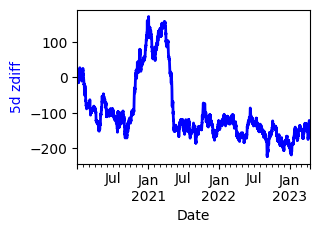

In [19]:
import matplotlib.pyplot as plt
# plot the zdiff values
fig5 = plt.figure(figsize=(3, 2))
ax5 = fig5.add_subplot(111)
new_df['zdiff_5d'].cumsum().plot(ax=ax5, color='b', lw=2.)
ax5.set_ylabel('5d zdiff', color='b')
ax5.set_xlabel('Date')


Text(0.5, 0, 'Date')

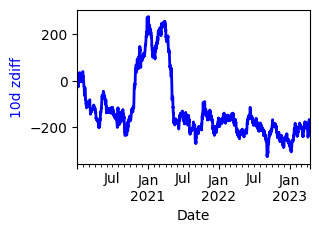

In [20]:
fig10 = plt.figure(figsize=(3,2))
ax10 = fig10.add_subplot(111)
new_df['zdiff_10d'].cumsum().plot(ax=ax10, color='b', lw=2.)
ax10.set_ylabel('10d zdiff', color='b')
ax10.set_xlabel('Date')


Text(0.5, 0, 'Date')

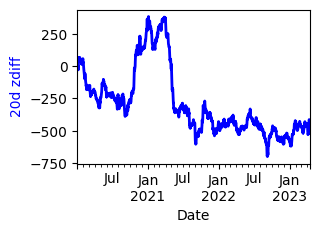

In [21]:
fig20 = plt.figure(figsize=(3,2))
ax20 = fig20.add_subplot(111)
new_df['zdiff_20d'].cumsum().plot(ax=ax20, color='b', lw=2.)
ax20.set_ylabel('20d zdiff', color='b')
ax20.set_xlabel('Date')


Text(0.5, 0, 'Date')

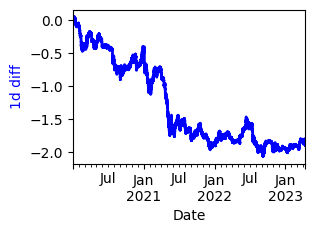

In [27]:
fig1 = plt.figure(figsize=(3,2))
ax1 = fig1.add_subplot(111)
new_df['diff_1d'].cumsum().plot(ax=ax1, color='b', lw=2.)
ax1.set_ylabel('1d diff', color='b')
ax1.set_xlabel('Date')


In [23]:
new_df["wtBTC"] = new_df[['stddev_1d_BTC', 'stddev_1d_ETH']].max(axis=1) / new_df['stddev_1d_BTC']
new_df["wtETH"] = new_df[['stddev_1d_BTC', 'stddev_1d_ETH']].max(axis=1) / new_df['stddev_1d_ETH']
# add the sum of wt
new_df['wt_sum'] = new_df['wtBTC'] + new_df['wtETH']
# normalize the weights
new_df['wtBTC'] = new_df['wtBTC'] / new_df['wt_sum']
new_df['wtETH'] = new_df['wtETH'] / new_df['wt_sum']
# drop the wt_sum column
new_df.drop('wt_sum', axis=1, inplace=True)
new_df.tail()


,zdiff_1d,zdiff_5d,zdiff_10d,zdiff_20d,stddev_1d_BTC,stddev_1d_ETH,diff_1d,signal_1,signal_5,signal_10,signal_20,wtBTC,wtETH
date,,,,,,,,,,,,,
2023-04-14 19:00:00,-0.150136,-1.273903,-1.287952,-1.698302,0.004917,0.012516,-0.003762,NaN,1.0,1.0,1.0,0.717938,0.282062
2023-04-14 20:00:00,0.303746,-0.380282,-1.020222,-1.632476,0.004889,0.012536,-0.002914,NaN,NaN,1.0,1.0,0.719413,0.280587
2023-04-14 21:00:00,0.147449,0.293842,-0.988416,-1.636162,0.004988,0.012573,0.001397,NaN,NaN,NaN,1.0,0.715964,0.284036
2023-04-14 22:00:00,-0.066957,0.070152,-0.769635,-1.831185,0.004988,0.012587,-0.000695,NaN,NaN,NaN,1.0,0.716172,0.283828
2023-04-14 23:00:00,0.268216,0.300390,-0.834665,-0.629599,0.004987,0.012582,0.002759,NaN,NaN,NaN,NaN,0.716130,0.283870


In [24]:
# Calculate future returns 
new_df["current_ret"] = (stockA["returns_1d"]*new_df["wtBTC"].shift(1) - stockB["returns_1d"]*new_df["wtETH"].shift(1))
new_df.tail()

,zdiff_1d,zdiff_5d,zdiff_10d,zdiff_20d,stddev_1d_BTC,stddev_1d_ETH,diff_1d,signal_1,signal_5,signal_10,signal_20,wtBTC,wtETH,current_ret
date,,,,,,,,,,,,,,
2023-04-14 19:00:00,-0.150136,-1.273903,-1.287952,-1.698302,0.004917,0.012516,-0.003762,NaN,1.0,1.0,1.0,0.717938,0.282062,-0.000529
2023-04-14 20:00:00,0.303746,-0.380282,-1.020222,-1.632476,0.004889,0.012536,-0.002914,NaN,NaN,1.0,1.0,0.719413,0.280587,0.001051
2023-04-14 21:00:00,0.147449,0.293842,-0.988416,-1.636162,0.004988,0.012573,0.001397,NaN,NaN,NaN,1.0,0.715964,0.284036,0.000524
2023-04-14 22:00:00,-0.066957,0.070152,-0.769635,-1.831185,0.004988,0.012587,-0.000695,NaN,NaN,NaN,1.0,0.716172,0.283828,-0.000239
2023-04-14 23:00:00,0.268216,0.300390,-0.834665,-0.629599,0.004987,0.012582,0.002759,NaN,NaN,NaN,NaN,0.716130,0.283870,0.000958


In [28]:
LongCap = 1
ShortCap = -1
new_df['LongCap'] = np.where((new_df['zdiff_5d'] > LongCap) & (new_df['position'].shift(1) == 1), 1, 0)
new_df['ShortCap'] = np.where((new_df['zdiff_5d'] < ShortCap) & (new_df['position'].shift(1) == -1), 1, 0)



KeyError: 'position'